In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [39]:
#pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [8]:
from PIL import Image

In [10]:
import random

In [12]:
from matplotlib.patches import Rectangle,Circle,Polygon

In [14]:
import matplotlib

    Intention: be able to randomly generate images to feed to LLM to test its ability to "count"

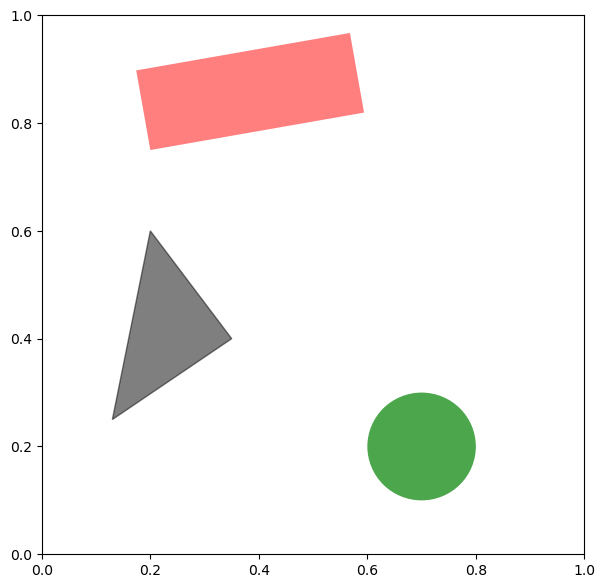

In [188]:
fig = plt.figure(figsize=(7,7),frameon=False)

ax = fig.add_subplot(1, 1, 1)

plt.xlim(0,1)
plt.ylim(0,1)

pp1 = Rectangle((0.2, 0.75), #coords of bottom left corner
                width=0.4, 
                height=0.15,
                angle=10,
                facecolor="red",
                alpha=0.5,)

pp2 = Circle((0.7, 0.2),
             radius=0.1,
             facecolor="green",
             alpha=0.7)

pp3 = Polygon([[0.13, 0.25],
              [0.35, 0.4],
              [0.2, 0.6]],
              color="k",
              alpha=0.5,
              )

#depict illustrations
ax.add_patch(pp1)
ax.add_patch(pp2)
ax.add_patch(pp3)

plt.show()

In [16]:
import matplotlib.colors as mcolors

In [18]:
colors = list(mcolors.BASE_COLORS)
colors

['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

In [20]:
colors.remove("w")
colors

['b', 'g', 'r', 'c', 'm', 'y', 'k']

In [22]:
round(random.random(),2) #generates number between 0 and 1

0.76

In [24]:
random.choice(colors)

'm'

In [26]:
def rand_num():
    """Outputs random number between 0 & 1 with 2 decimal places"""
    return round(random.random(),2)

def rand_color():
    """Outputs random base color"""
    return random.choice(colors)

In [28]:
def generate_coord():
    """Outputs a tuple/coordinate point"""
    return (rand_num(),rand_num()) #tuple

def distance_formula(coord1,coord2):
    """Calculate distance given two tuples/coordinate points"""
    x1,y1 = coord1
    x2,y2 = coord2
    dist = ( (x1-x2)**2 + (y1-y2)**2 )**0.5
    return dist

def is_triangle(coord1,coord2,coord3):
    """Test if real triangle based on 3 points
    Boolean output"""
    side1 = distance_formula(coord1,coord2)
    side2 = distance_formula(coord3,coord2)
    side3 = distance_formula(coord1,coord3)
    if not (side1+side2>side3 and side1+side3>side1 and side2+side3>side1):
        return False
    if side1 == 0 or side2 == 0 or side3 == 0:
        return False
    else:
        return True

In [30]:
rand_num()

0.76

In [32]:
def rand_small_num(limit=0.5):
    """Keeps random number under certain decimal value; automatically set to 0.5"""
    h = rand_num()
    while h > limit:
        h /= 2
    return h

In [1094]:
def generate_rectangle(w=0.5,h=0.35):
    """Generates rectangle; width/height can be varied"""
    return Rectangle(generate_coord(), 
                width=rand_small_num(w), 
                height=rand_small_num(h),
                angle=rand_num()*10,
                facecolor=rand_color(),
                alpha=0.6
                )

In [36]:
def generate_circle(r=0.3):
    """Generates circle; radius can be varied"""
    return Circle(generate_coord(),
           radius=rand_small_num(r),
           facecolor=rand_color(),
           alpha=0.6
           )

In [38]:
def generate_triangle():
    "Generates triangle"
    valid_triangle = False
    while not valid_triangle:
        coord1,coord2,coord3 = generate_coord(),generate_coord(),generate_coord()
        valid_triangle = is_triangle(coord1,coord2,coord3)
    
    return Polygon([coord1,
           coord2,
           coord3],
           color=random.choice(colors),
           alpha=0.6
           )

    Modularize later?

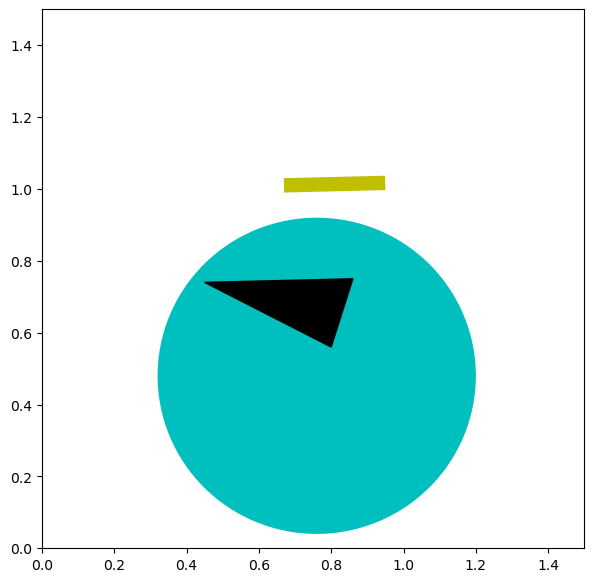

In [500]:
#Make image
fig = plt.figure(figsize=(7,7),frameon=False)
ax = fig.add_subplot(1, 1, 1)
plt.xlim(0,1.5)
plt.ylim(0,1.5)

#randomly generate shapes
rectangle = generate_rectangle()

circle = generate_circle()

triangle = generate_triangle()


#depict illustrations
ax.add_patch(rectangle)
ax.add_patch(circle)
ax.add_patch(triangle)

plt.show()

In [184]:
random.randint(0,5)

0

In [41]:
def rand_count(max=5):
    """Returns random whole number; max can be varied"""
    return random.randint(0,max)

In [43]:
def multiple_shapes(ax,max=5,limit1=0.5,limit2=0.35,verbose=False):
    """Automatically generates multiple shapes and adds to given figure; can generate string counting each shape type (automatically set to False)"""
    #rectangles
    counter = rand_count(max)
    rect=counter
    while counter > 0:
        rectangle = generate_rectangle(limit1,limit2)
        ax.add_patch(rectangle)
        counter -= 1
    
    #circles
    counter = rand_count(max)
    circ=counter
    while counter > 0:
        circle = generate_circle(limit2)
        ax.add_patch(circle)
        counter -= 1
    
    #triangles
    counter = rand_count(max)
    tri=counter
    while counter > 0:
        triangle = generate_triangle()
        ax.add_patch(triangle)
        counter -= 1

    if verbose:
        return f"There are {rect} rectangles, {circ} circles, and {tri} triangles in this image."
    else:
        return f"r{rect}_c{circ}_t{tri}"

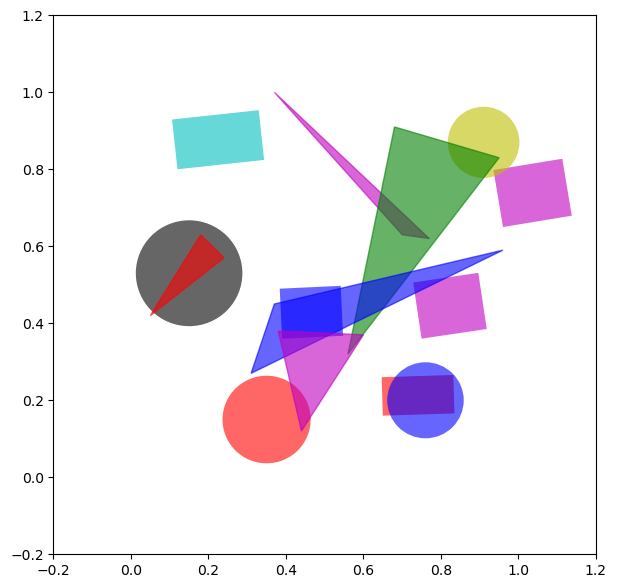

In [619]:
fig = plt.figure(figsize=(7,7),frameon=False)
ax = fig.add_subplot(1, 1, 1,
                     xlim=(-0.2,1.2),
                     ylim=(-0.2,1.2))

multiple_shapes(ax,limit1=0.3,limit2=0.18)
plt.show()

In [213]:
def generate_image(verb=False,max=5,l1=0.3,l2=0.18,path="/Users/zainabsiddiqui/Downloads/Data_Problems/LLM_Project/Data"):
    """Fully generates image with random assortment of shapes & automatically saves figure; descriptive statement can be generated; shape sizes can be adjusted"""
    fig = plt.figure(figsize=(6,6),
                     #frameon=False
                    )
    ax = fig.add_subplot(1, 1, 1,
                         xlim=(-0.2,1.2),
                         ylim=(-0.2,1.2))
    ax.axis('off')
    description = multiple_shapes(ax,max,limit1=l1,limit2=l2,verbose=verb)

    plt.show()
    if verb:
        print(description)
    
        #plt.show()
    else:
        #return description
        save = input(f"""{description}\n\nSave figure?\n""").lower().strip()
        if save == "yes":
            fig_name = description+".png"
            fig.savefig(f"{path}/{fig_name}")
        #else:
            
    
    #plt.show()

In [429]:
colors

['b', 'g', 'r', 'c', 'm', 'y', 'k']

In [815]:
colors=['b', 'g', 'r', 'c', 'm', 'y', 'k']

In [729]:
colors =["k"]

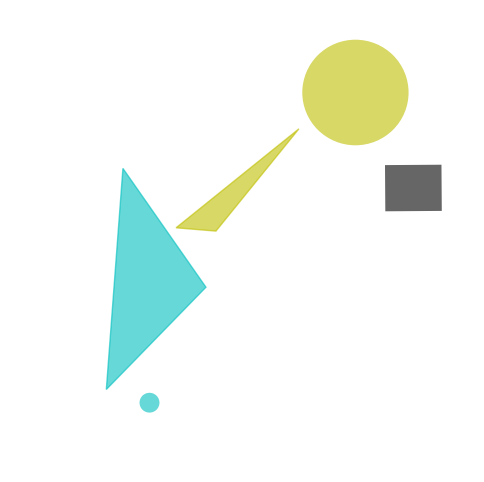

r1_c2_t2

Save figure?
 yes


In [1409]:
generate_image(max=3)

In [535]:
text = '''
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
import random
import matplotlib
from matplotlib.patches import Rectangle,Circle,Polygon
import matplotlib.colors as mcolors

from google import genai


colors = list(mcolors.BASE_COLORS)
colors.remove("w")

def generate_coord():
    "Outputs a tuple/coordinate point"
    return (rand_num(),rand_num()) #tuple

def distance_formula(coord1,coord2):
    "Calculate distance given two tuples/coordinate points"
    x1,y1 = coord1
    x2,y2 = coord2
    dist = ( (x1-x2)**2 + (y1-y2)**2 )**0.5
    return dist

def is_triangle(coord1,coord2,coord3):
    "Test if real triangle based on 3 points; Boolean output"
    side1 = distance_formula(coord1,coord2)
    side2 = distance_formula(coord3,coord2)
    side3 = distance_formula(coord1,coord3)
    if not (side1+side2>side3 and side1+side3>side1 and side2+side3>side1):
        return False
    if side1 == 0 or side2 == 0 or side3 == 0:
        return False
    else:
        return True

def rand_small_num(limit=0.5):
    "Keeps random number under certain decimal value; automatically set to 0.5"
    h = rand_num()
    while h > limit:
        h /= 2
    return h

def generate_rectangle(w=0.5,h=0.35):
    "Generates rectangle; width/height can be varied"
    return Rectangle(generate_coord(), 
                width=rand_small_num(w), 
                height=rand_small_num(h),
                angle=rand_num()*10,
                facecolor=rand_color(),
                alpha=0.6
                )

def generate_circle(r=0.3):
    "Generates circle; radius can be varied"
    return Circle(generate_coord(),
           radius=rand_small_num(r),
           facecolor=rand_color(),
           alpha=0.6
           )

def generate_triangle():
    "Generates triangle"
    valid_triangle = False
    while not valid_triangle:
        coord1,coord2,coord3 = generate_coord(),generate_coord(),generate_coord()
        valid_triangle = is_triangle(coord1,coord2,coord3)
    
    return Polygon([coord1,
           coord2,
           coord3],
           color=random.choice(colors),
           alpha=0.6
           )

def rand_count(max=5):
    "Returns random whole number; max can be varied"
    return random.randint(0,max)


def multiple_shapes(ax,max=5,limit1=0.5,limit2=0.35,verbose=False):
    """Automatically generates multiple shapes and adds to given figure; can generate string counting each shape type (automatically set to False)"""
    #rectangles
    counter = rand_count(max)
    rect=counter
    while counter > 0:
        rectangle = generate_rectangle(limit1,limit2)
        ax.add_patch(rectangle)
        counter -= 1
    
    #circles
    counter = rand_count(max)
    circ=counter
    while counter > 0:
        circle = generate_circle(limit2)
        ax.add_patch(circle)
        counter -= 1
    
    #triangles
    counter = rand_count(max)
    tri=counter
    while counter > 0:
        triangle = generate_triangle()
        ax.add_patch(triangle)
        counter -= 1

    if verbose:
        return f"There are {rect} rectangles, {circ} circles, and {tri} triangles in this image."
    else:
        return f"r{rect}_c{circ}_t{tri}"


def generate_image(verb=False,max=5,l1=0.3,l2=0.18,path="/Users/zainabsiddiqui/Downloads/Data_Problems/LLM_Project/Data"):
    """Fully generates image with random assortment of shapes & automatically saves figure; descriptive statement can be generated; shape sizes can be adjusted"""
    fig = plt.figure(figsize=(6,6),
                     #frameon=False
                    )
    ax = fig.add_subplot(1, 1, 1,
                         xlim=(-0.2,1.2),
                         ylim=(-0.2,1.2))
    ax.axis('off')
    description = multiple_shapes(ax,max,limit1=l1,limit2=l2,verbose=verb)

    plt.show()
    if verb:
        print(description)
    
        #plt.show()
    else:
        #return description
        save = input(f"""{description}\n\nSave figure?\n""").lower().strip()
        if save == "yes":
            fig_name = description+".png"
            fig.savefig(f"{path}/{fig_name}")



#LLM_Test_API.ipynb functions

def get_response(image_path, show=True,
                 model="gemma-3-27b-it",
                 REQUEST="Identify and count the shapes in this image",):
    image = Image.open(image_path)

    response = client.models.generate_content(
      model=model,
      contents=[image, REQUEST],
      )
    
    print(response.text) # The output often is markdown

    #move image after it's tested
    image_path_sep = image_path.split("/") 
    new_path=""
    for dir in image_path_sep[:-1]:
        new_path += f"/{dir}"

    new_path+=f"/Used/{image_path_sep[-1]}"
    
    os.rename(image_path,new_path)

    if show:
        plt.figure(frameon=False)
        plt.imshow(image)
        plt.axis(False)
        plt.show()
'''

#with open('LLM_images.py', 'w') as file:
#    file.write(text)

### Circles Only

In [833]:
def generate_circle_new(r=0.3,same=False):
    """Generates circle; radius can be varied"""
    if same:
        rad = r
    else:
        rad=rand_small_num(r)
        
    return Circle(generate_coord(),
           radius=rad,
           facecolor=rand_color(),
           alpha=0.6
           )



def multiple_circles(ax,max=5,rad_limit=0.5,same=False,verbose=False):
    """Automatically generates multiple circles and adds to given figure; can generate string counting each shape type (automatically set to False)"""
    
    rect,circ,tri = 0,0,0
    
    #rectangles
    #counter = rand_count(max)
    #rect=counter
    #while counter > 0:
    #    rectangle = generate_rectangle(limit1,limit2)
    #    ax.add_patch(rectangle)
    #    counter -= 1
    
    #circles
    counter = rand_count(max)
    circ=counter
    while counter > 0:
        circle = generate_circle_new(rad_limit,same)
        ax.add_patch(circle)
        counter -= 1
    
    #triangles
    #counter = rand_count(max)
    #tri=counter
    #while counter > 0:
    #    triangle = generate_triangle()
    #    ax.add_patch(triangle)
    #    counter -= 1

    if verbose:
        return f"There {circ} circles in this image."
    else:
        return f"r{rect}_c{circ}_t{tri}"

In [1037]:
def generate_circles_image(verb=False,max=8,lim=0.3,same=True,path="/Users/zainabsiddiqui/Downloads/Data_Problems/LLM_Project/Data/Circles/Different"):
    """Fully generates image with random circles & automatically saves figure; descriptive statement can be generated; circle sizes can be adjusted"""
    fig = plt.figure(figsize=(6,6))
    
    ax = fig.add_subplot(1, 1, 1,
                         xlim=(-0.2,1.2),
                         ylim=(-0.2,1.2))
    ax.axis('off')
    description = multiple_circles(ax,max,rad_limit=lim,same=same,verbose=verb)

    plt.show()
    if verb:
        print(description)

    else:
        save = "yes"# input(f"""{description}\n\nSave figure?\n""").lower().strip()
        if save == "yes":
            fig_name = description+".png"
            new_path = f"{path}/{fig_name}"
            count = 1
            while os.path.exists(new_path)==True:
                new_path = f"{path}/{description}_{count}.png"
                count += 1
            fig.savefig(new_path)

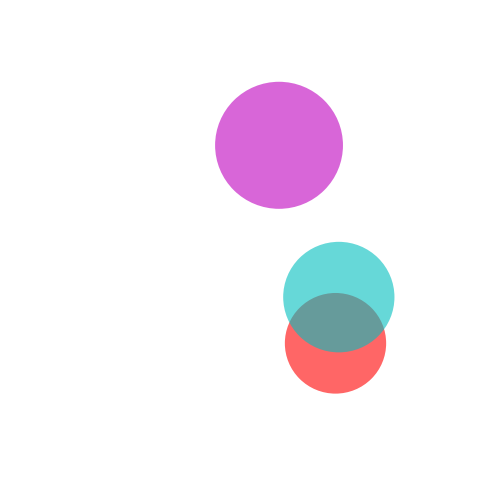

In [1045]:
count = 1
while count>0:
    generate_circles_image(lim=0.2,same=False)
    count-=1

In [913]:
data_dir="/Users/zainabsiddiqui/Downloads/Data_Problems/LLM_Project/Data"

### Triangles Only

In [ ]:
def generate_triangle():
    "Generates triangle"
    valid_triangle = False
    while not valid_triangle:
        coord1,coord2,coord3 = generate_coord(),generate_coord(),generate_coord()
        valid_triangle = is_triangle(coord1,coord2,coord3)
    
    return Polygon([coord1,
           coord2,
           coord3],
           color=random.choice(colors),
           alpha=0.6
           )

In [1056]:
def multiple_triangles(ax,max=8,same=False,verbose=False):
    """Automatically generates multiple triangles and adds to given figure; can generate string counting each shape type (automatically set to False)"""
    
    rect,circ,tri = 0,0,0
    
    #rectangles
    #counter = rand_count(max)
    #rect=counter
    #while counter > 0:
    #    rectangle = generate_rectangle(limit1,limit2)
    #    ax.add_patch(rectangle)
    #    counter -= 1
    
    #circles
    #counter = rand_count(max)
    #circ=counter
    #while counter > 0:
    #    circle = generate_circle_new(rad_limit,same)
    #    ax.add_patch(circle)
    #    counter -= 1
    
    #triangles
    counter = rand_count(max)
    tri=counter
    while counter > 0:
        triangle = generate_triangle()
        ax.add_patch(triangle)
        counter -= 1

    if verbose:
        return f"There {tri} triangles in this image."
    else:
        return f"r{rect}_c{circ}_t{tri}"

In [1050]:
def generate_triangles_image(verb=False,max=8,same=True,path="/Users/zainabsiddiqui/Downloads/Data_Problems/LLM_Project/Data/Triangles"):
    """Fully generates image with random circles & automatically saves figure; descriptive statement can be generated; circle sizes can be adjusted"""
    fig = plt.figure(figsize=(6,6))
    
    ax = fig.add_subplot(1, 1, 1,
                         xlim=(-0.2,1.2),
                         ylim=(-0.2,1.2))
    ax.axis('off')
    description = multiple_triangles(ax,max,same=same,verbose=verb)

    plt.show()
    if verb:
        print(description)

    else:
        save = "yes"# input(f"""{description}\n\nSave figure?\n""").lower().strip()
        if save == "yes":
            fig_name = description+".png"
            new_path = f"{path}/{fig_name}"
            count = 1
            while os.path.exists(new_path)==True:
                new_path = f"{path}/{description}_{count}.png"
                count += 1
            fig.savefig(new_path)

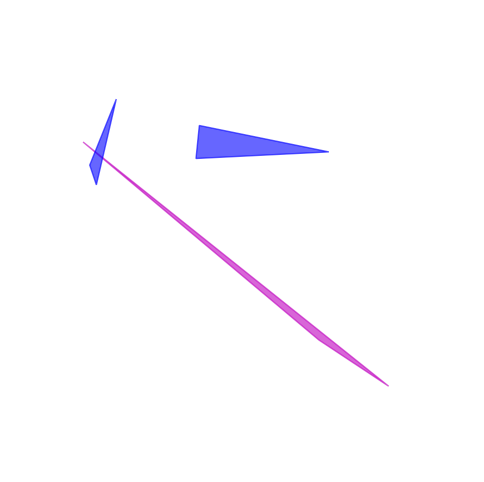

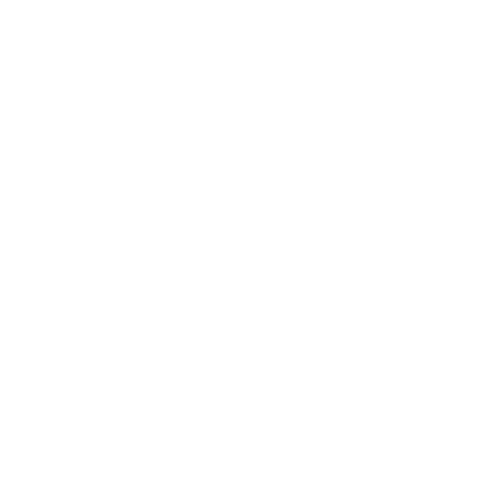

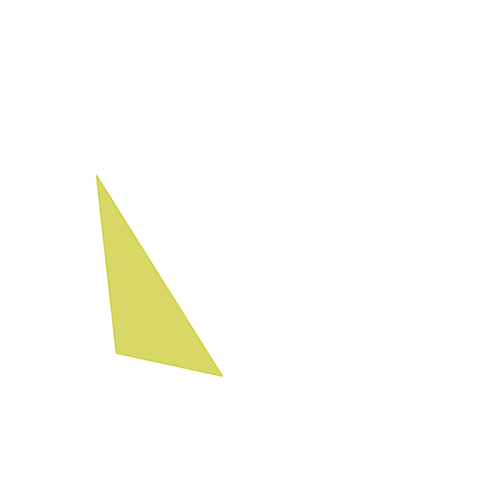

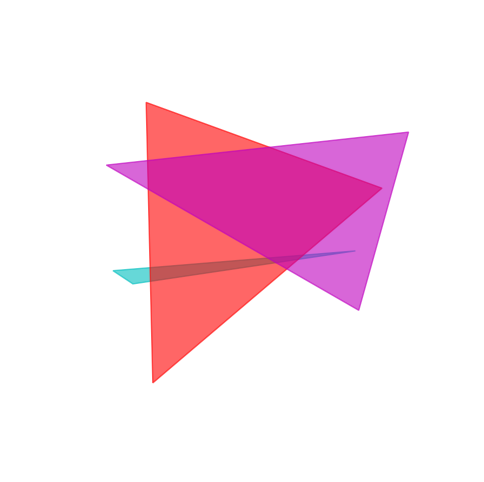

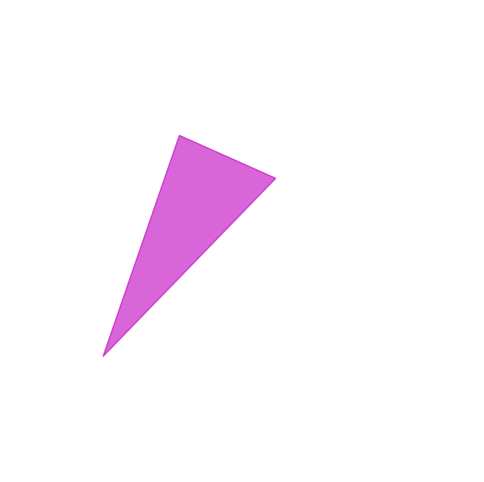

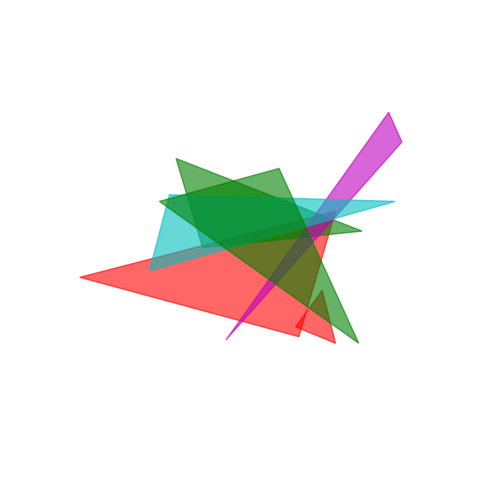

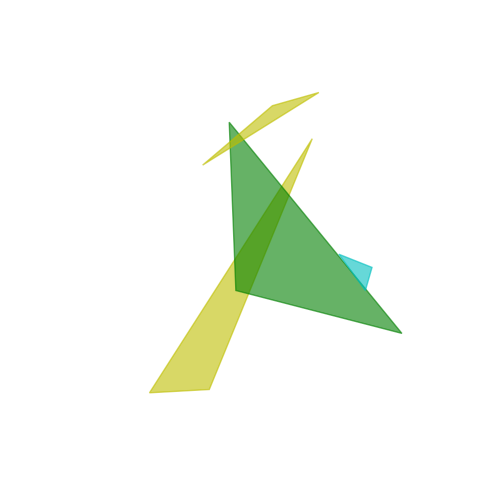

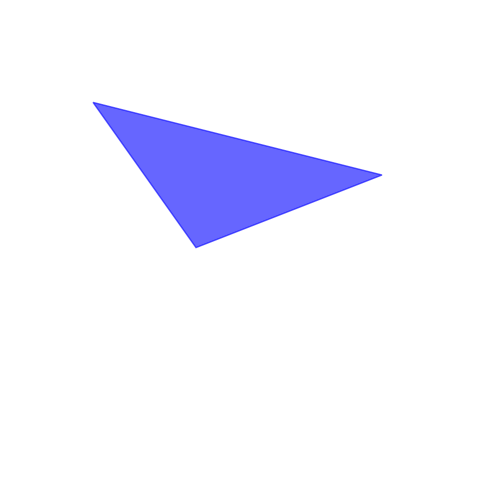

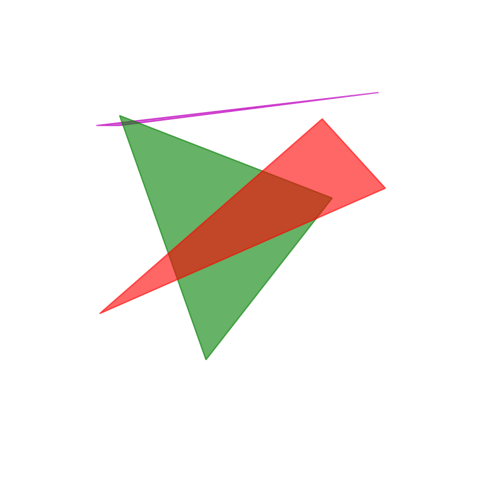

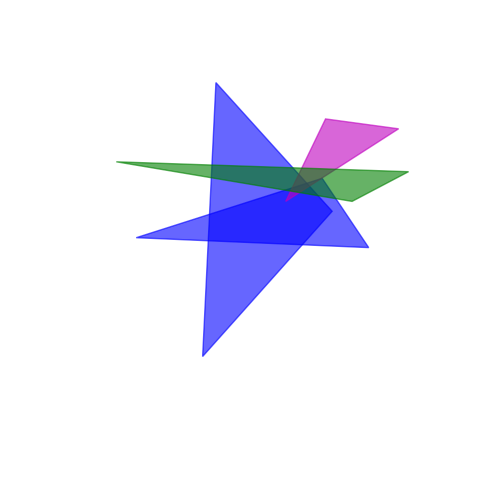

In [1066]:
count = 10
while count>0:
    generate_triangles_image(max=6)
    count-=1

## Triangles & Circles

In [1069]:
def multiple_circles_triangles(ax,max=5,rad_limit=0.5,same=False,verbose=False):
    """Automatically generates multiple circles and adds to given figure; can generate string counting each shape type (automatically set to False)"""
    
    rect,circ,tri = 0,0,0
    
    #rectangles
    #counter = rand_count(max)
    #rect=counter
    #while counter > 0:
    #    rectangle = generate_rectangle(limit1,limit2)
    #    ax.add_patch(rectangle)
    #    counter -= 1
    
    #circles
    counter = rand_count(max)
    circ=counter
    while counter > 0:
        circle = generate_circle_new(rad_limit,same)
        ax.add_patch(circle)
        counter -= 1
    
    #triangles
    counter = rand_count(max)
    tri=counter
    while counter > 0:
        triangle = generate_triangle()
        ax.add_patch(triangle)
        counter -= 1

    if verbose:
        return f"There {circ} circles and {tri} triangles in this image."
    else:
        return f"r{rect}_c{circ}_t{tri}"

In [1077]:
def generate_triangle_circle_image(verb=False,max=8,lim=0.3,
                               same=True,
                               path="/Users/zainabsiddiqui/Downloads/Data_Problems/LLM_Project/Data/Triangles_Circles"):
    """Fully generates image with random circles & automatically saves figure; descriptive statement can be generated; circle sizes can be adjusted"""
    fig = plt.figure(figsize=(6,6))
    
    ax = fig.add_subplot(1, 1, 1,
                         xlim=(-0.2,1.2),
                         ylim=(-0.2,1.2))
    ax.axis('off')
    description = multiple_circles_triangles(ax,max,rad_limit=lim,same=same,verbose=verb)

    plt.show()
    if verb:
        print(description)

    else:
        save = "yes"# input(f"""{description}\n\nSave figure?\n""").lower().strip()
        if save == "yes":
            fig_name = description+".png"
            new_path = f"{path}/{fig_name}"
            count = 1
            while os.path.exists(new_path)==True:
                new_path = f"{path}/{description}_{count}.png"
                count += 1
            fig.savefig(new_path)

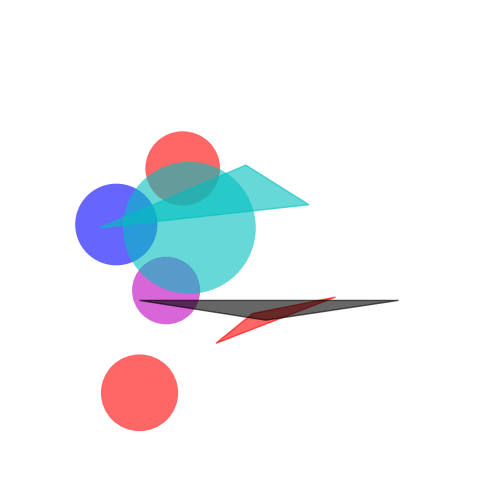

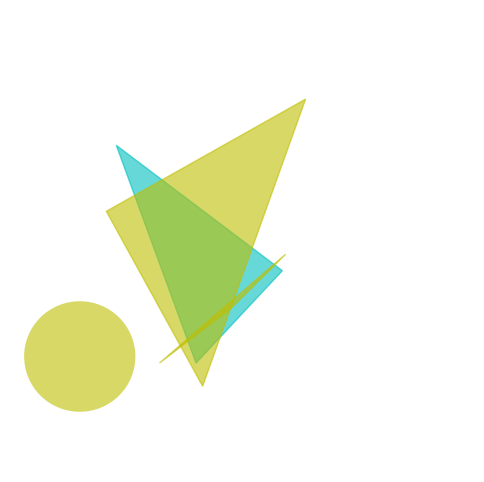

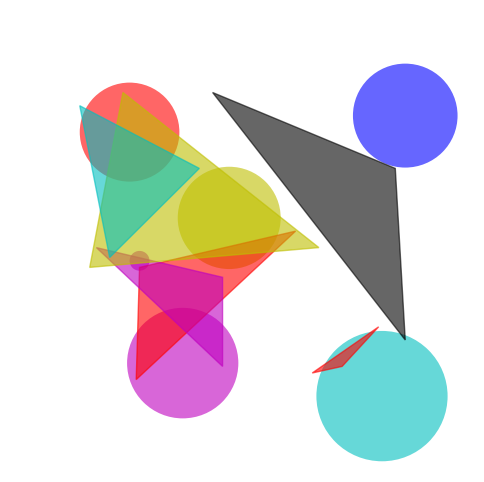

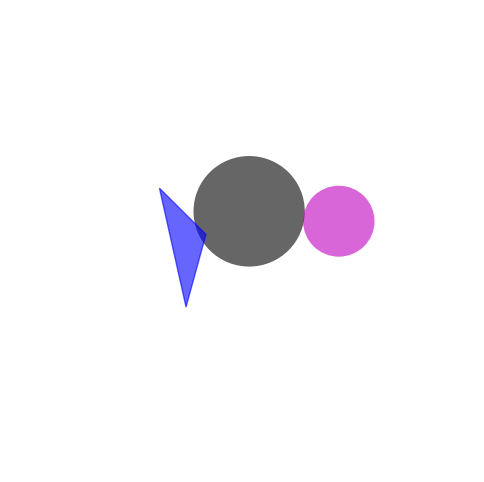

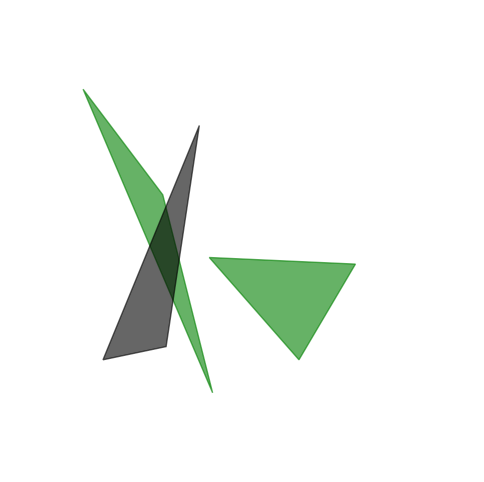

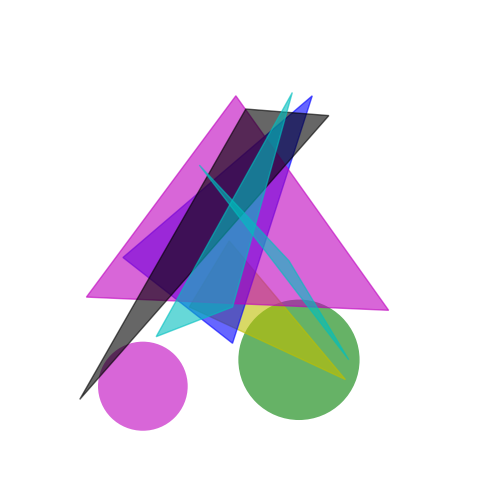

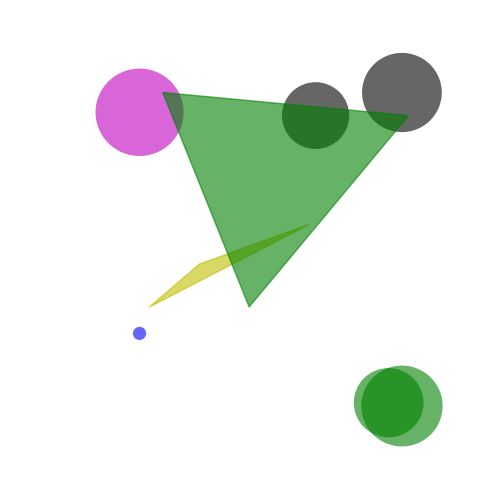

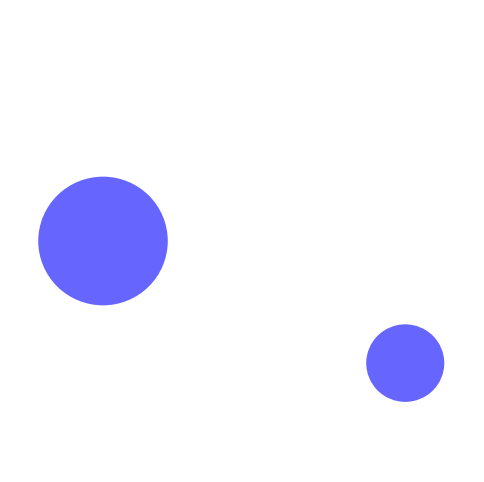

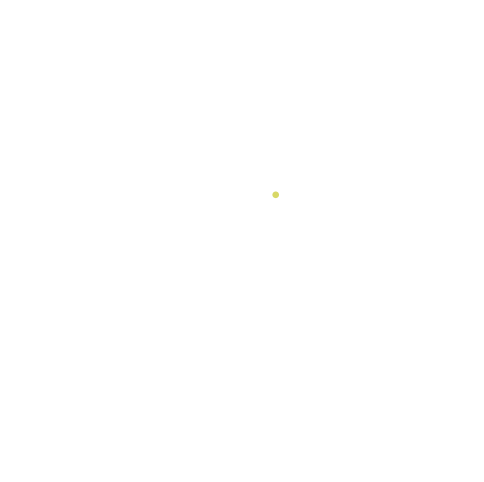

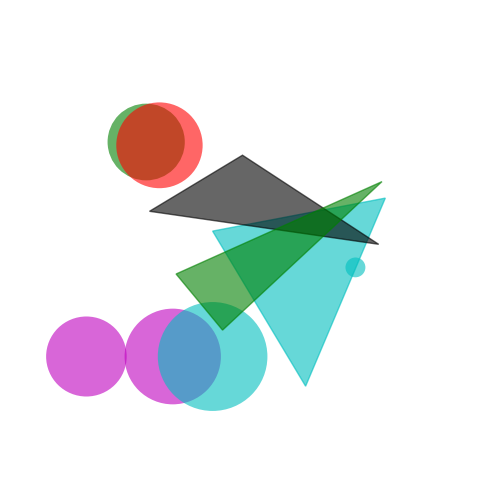

In [1087]:
count = 10
while count>0:
    generate_triangle_circle_image(max=6,lim=0.2,same=False)
    count-=1

## Rectangles Only

In [1092]:
def generate_rectangle_new(w=0.5,h=0.35, same = False):
    "Generates rectangle; width/height can be varied"
    
    if same:
        H = h
        W = w
        A = 0
    else:
        H=rand_small_num(h)
        W=rand_small_num(w)
        A=rand_num()*10
    return Rectangle(generate_coord(), 
                width=W, 
                height=H,
                angle=A,
                facecolor=rand_color(),
                alpha=0.6
                )

In [1096]:
def multiple_rectangles(ax,max=8,limit1=0.5,limit2=0.35,same=True,verbose=False):
    """Automatically generates multiple triangles and adds to given figure; can generate string counting each shape type (automatically set to False)"""
    
    rect,circ,tri = 0,0,0
    
    #rectangles
    counter = rand_count(max)
    rect=counter
    while counter > 0:
        #if same:
            #limit1=rand_small_num(limit1)
            #limit2=rand_small_num(limit2)
        
        rectangle = generate_rectangle_new(limit1,limit2,same)
        ax.add_patch(rectangle)
        counter -= 1
    
    #circles
    #counter = rand_count(max)
    #circ=counter
    #while counter > 0:
    #    circle = generate_circle_new(rad_limit,same)
    #    ax.add_patch(circle)
    #    counter -= 1
    
    #triangles
    #counter = rand_count(max)
    #tri=counter
    #while counter > 0:
    #    triangle = generate_triangle()
    #    ax.add_patch(triangle)
    #    counter -= 1

    if verbose:
        return f"There {rect} rectangles in this image."
    else:
        return f"r{rect}_c{circ}_t{tri}"

In [1204]:
def generate_rectangles_image(verb=False,
                              max=8,
                              lim1=0.5,lim2=0.35,
                              SAVE="yes",
                              same=True,
                              path="/Users/zainabsiddiqui/Downloads/Data_Problems/LLM_Project/Data/Rectangles"):
    """Fully generates image with random rectangles & automatically saves figure; descriptive statement can be generated; rectangle sizes can be adjusted"""
    fig = plt.figure(figsize=(6,6))
    
    ax = fig.add_subplot(1, 1, 1,
                         xlim=(-0.2,1.2),
                         ylim=(-0.2,1.2))
    ax.axis('off')
    description = multiple_rectangles(ax,max,lim1,lim2,same=same,verbose=verb)

    plt.show()
    if verb:
        print(description)

    else:
        save = SAVE# input(f"""{description}\n\nSave figure?\n""").lower().strip()
        if save == "yes":
            fig_name = description+".png"
            new_path = f"{path}/{fig_name}"
            count = 1
            while os.path.exists(new_path)==True:
                new_path = f"{path}/{description}_{count}.png"
                count += 1
            fig.savefig(new_path)

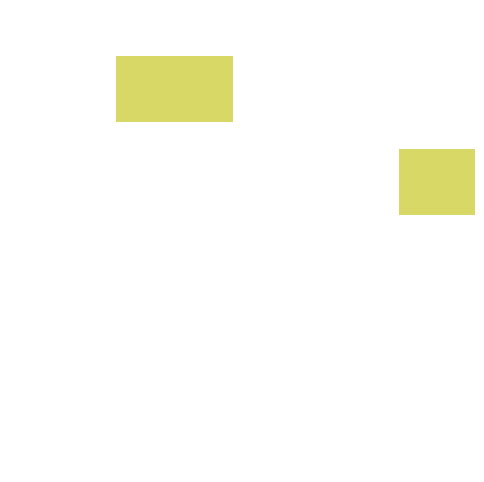

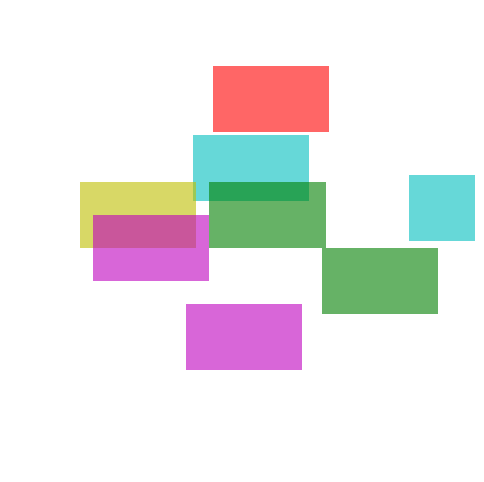

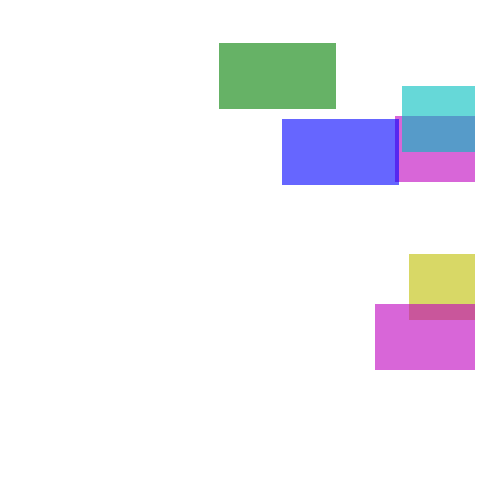

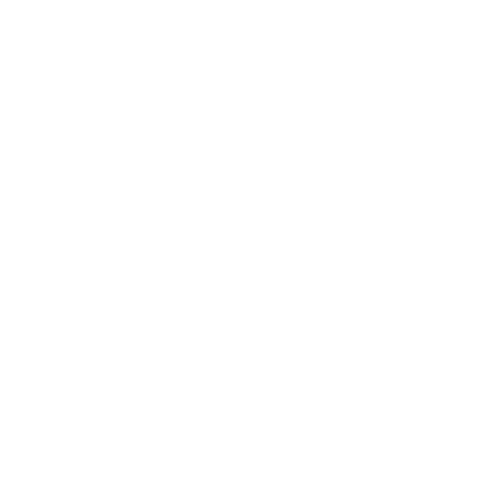

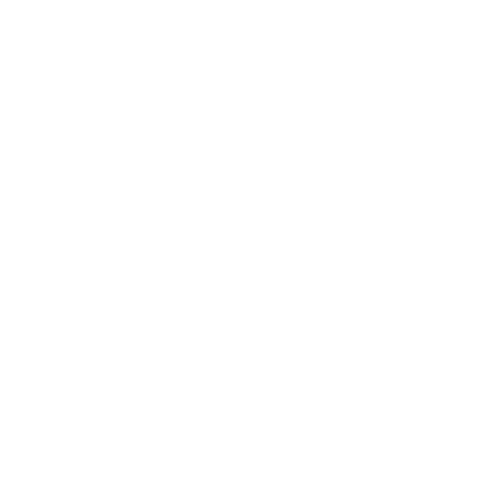

In [1193]:
count = 5
while count>0:
    generate_rectangles_image(max=8,SAVE="yes",lim1=0.35,lim2=0.2,same=True)
    count-=1

## Rectangles & Circles

In [1260]:
def multiple_circles_rectangles(ax,max=5,limit1=0.35,limit2=0.5,same=False,verbose=False):
    """Automatically generates multiple circles and adds to given figure; can generate string counting each shape type (automatically set to False)"""
    
    rect,circ,tri = 0,0,0
    
    #rectangles
    counter = rand_count(max)
    rect=counter
    while counter > 0:
        #if same:
            #limit1=rand_small_num(limit1)
            #limit2=rand_small_num(limit2)
        
        rectangle = generate_rectangle_new(limit1,limit2,same)
        ax.add_patch(rectangle)
        counter -= 1
    
    #circles
    counter = rand_count(max)
    circ=counter
    while counter > 0:
        circle = generate_circle_new(limit2,same)
        ax.add_patch(circle)
        counter -= 1
    
    #triangles
    #counter = rand_count(max)
    #tri=counter
    #while counter > 0:
    #    triangle = generate_triangle()
    #    ax.add_patch(triangle)
    #    counter -= 1

    if verbose:
        return f"There {circ} circles and {rect} rectangles in this image."
    else:
        return f"r{rect}_c{circ}_t{tri}"

In [1242]:
def generate_rectangles_circles_image(verb=False,
                              max=8,
                              lim1=0.5,lim2=0.35,
                              SAVE="yes",
                              same=False,
                              path="/Users/zainabsiddiqui/Downloads/Data_Problems/LLM_Project/Data/Rectangles_Circles"):
    """Fully generates image with random rectangles & automatically saves figure; descriptive statement can be generated; rectangle sizes can be adjusted"""
    fig = plt.figure(figsize=(6,6))
    
    ax = fig.add_subplot(1, 1, 1,
                         xlim=(-0.2,1.2),
                         ylim=(-0.2,1.2))
    ax.axis('off')
    description = multiple_circles_rectangles(ax,max,lim1,lim2,same=same,verbose=verb)

    plt.show()
    if verb:
        print(description)

    else:
        save = SAVE# input(f"""{description}\n\nSave figure?\n""").lower().strip()
        if save == "yes":
            fig_name = description+".png"
            new_path = f"{path}/{fig_name}"
            count = 1
            while os.path.exists(new_path)==True:
                new_path = f"{path}/{description}_{count}.png"
                count += 1
            fig.savefig(new_path)

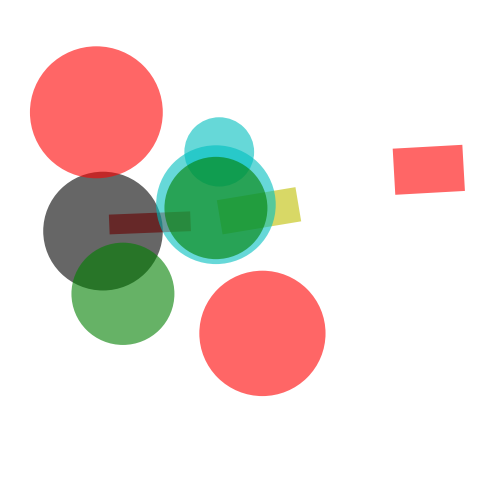

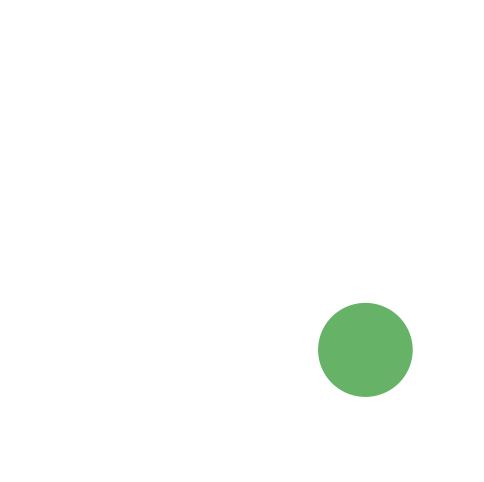

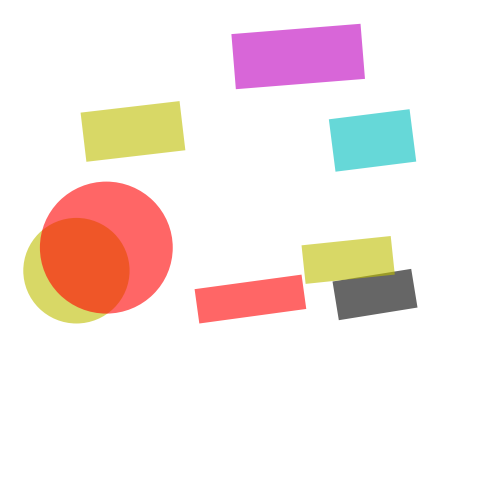

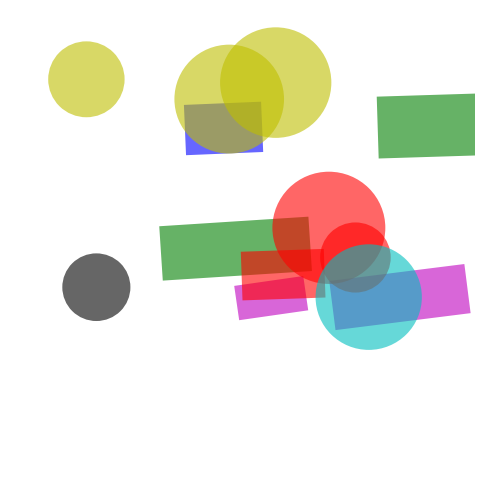

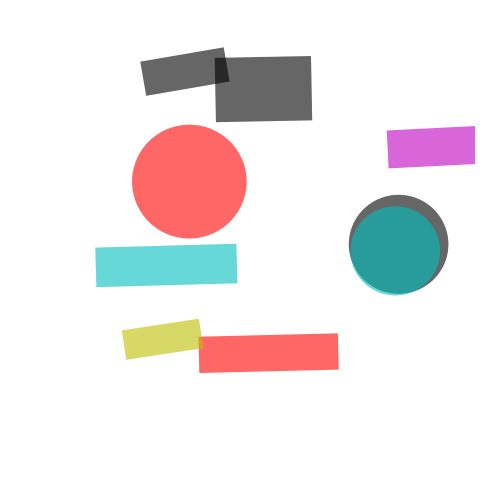

In [1268]:
count = 5
while count>0:
    generate_rectangles_circles_image(max=8,SAVE="yes",lim1=0.45,lim2=0.2,same=False)
    count-=1

## Rectangles & Triangles

In [1279]:
def multiple_rectangles_triangles(ax,max=5,limit1=0.35,limit2=0.5,same=False,verbose=False):
    """Automatically generates multiple rectangles & triangles and adds to given figure; can generate string counting each shape type (automatically set to False)"""
    
    rect,circ,tri = 0,0,0
    
    #rectangles
    counter = rand_count(max)
    rect=counter
    while counter > 0:
        #if same:
            #limit1=rand_small_num(limit1)
            #limit2=rand_small_num(limit2)
        
        rectangle = generate_rectangle_new(limit1,limit2,same)
        ax.add_patch(rectangle)
        counter -= 1
    
    #circles
    #counter = rand_count(max)
    #circ=counter
    #while counter > 0:
    #    circle = generate_circle_new(limit2,same)
    #    ax.add_patch(circle)
    #    counter -= 1
    
    #triangles
    counter = rand_count(6)
    tri=counter
    while counter > 0:
        triangle = generate_triangle()
        ax.add_patch(triangle)
        counter -= 1

    if verbose:
        return f"There {rect} rectangles and {tri} triangles in this image."
    else:
        return f"r{rect}_c{circ}_t{tri}"

In [1281]:
def generate_rectangles_triangles_image(verb=False,
                              max=8,
                              lim1=0.5,lim2=0.35,
                              SAVE="yes",
                              same=False,
                              path="/Users/zainabsiddiqui/Downloads/Data_Problems/LLM_Project/Data/Rectangles_Triangles"):
    """Fully generates image with random rectangles & automatically saves figure; descriptive statement can be generated; rectangle sizes can be adjusted"""
    fig = plt.figure(figsize=(6,6))
    
    ax = fig.add_subplot(1, 1, 1,
                         xlim=(-0.2,1.2),
                         ylim=(-0.2,1.2))
    ax.axis('off')
    description = multiple_rectangles_triangles(ax,max,lim1,lim2,same=same,verbose=verb)

    plt.show()
    if verb:
        print(description)

    else:
        save = SAVE# input(f"""{description}\n\nSave figure?\n""").lower().strip()
        if save == "yes":
            fig_name = description+".png"
            new_path = f"{path}/{fig_name}"
            count = 1
            while os.path.exists(new_path)==True:
                new_path = f"{path}/{description}_{count}.png"
                count += 1
            fig.savefig(new_path)

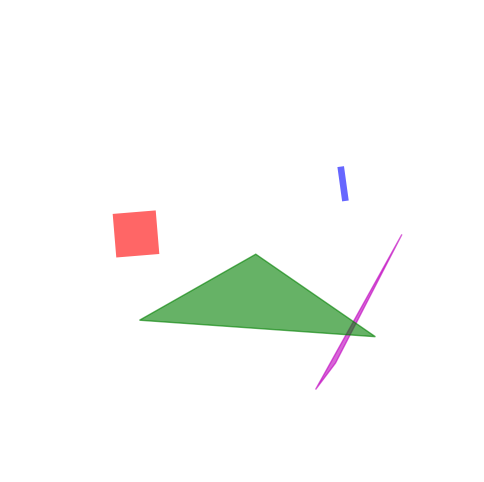

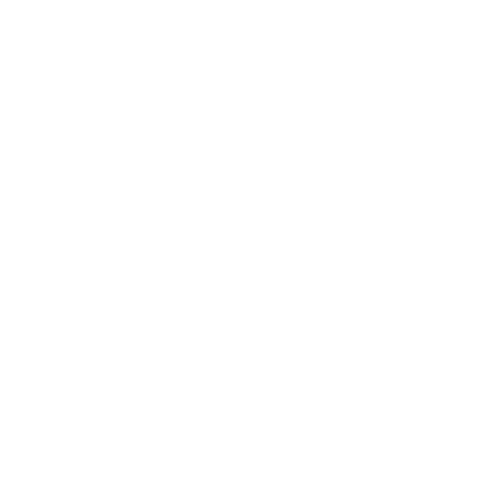

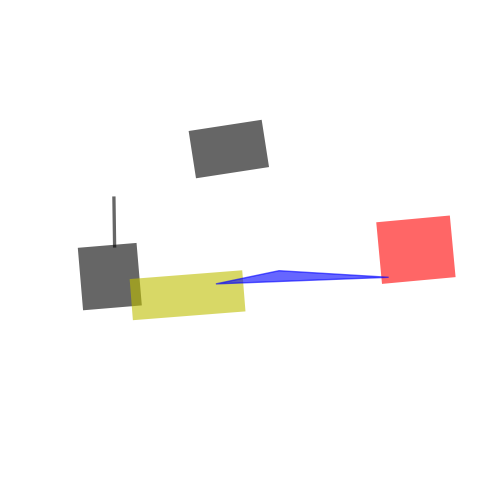

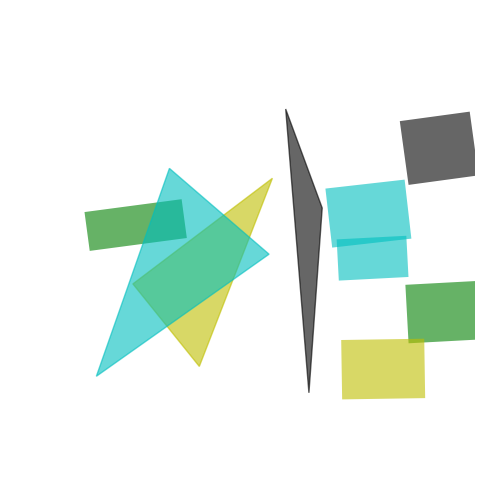

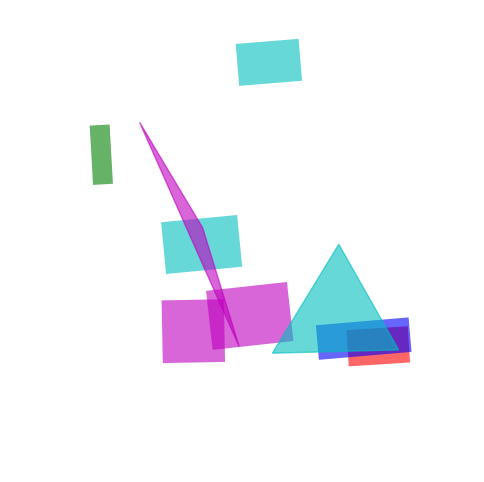

In [1293]:
count = 5
while count>0:
    generate_rectangles_triangles_image(max=8,SAVE="yes",lim1=0.35,lim2=0.2,same=False)
    count-=1